# Lab 1. PyTorch and ANNs

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

**Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link:

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [2]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)

    Precondition: n > 0, type(n) == int

    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """
    if type(n) != int or n <= 0:
      print("Invalid input")
      return -1
    sum = 0
    for i in range(1, n + 1):
      sum += i**3
    return sum

In [3]:
# unit test sum_of_cuves
sum_of_cubes(3)
sum_of_cubes(-1)
sum_of_cubes('x')

Invalid input
Invalid input


-1

### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [4]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1) unbound builtins.str method
    Return a list of the substrings in the string, using sep as the separator string.
    
      sep
        The separator used to split the string.
    
        When set to None (the default value), will split on any whitespace
        character (including \n \r \t \f and spaces) and will discard
        empty strings from the result.
      maxsplit
        Maximum number of splits.
        -1 (the default value) means no limit.
    
    Splitting starts at the front of the string and works to the end.
    
    Note, str.split() is mainly useful for data that has been intentionally
    delimited.  With natural text that includes punctuation, consider using
    the regular expression module.



In [5]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.

    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
    list_words = sentence.split()
    list_lengths = [len(word) for word in list_words]
    return list_lengths

In [6]:
# unit test for word_lengths
print(word_lengths("welcome to APS360!"))

print(word_lengths("machine learning is so cool"))

[7, 2, 7]
[7, 8, 2, 2, 4]


### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [7]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.

    >>> all_same_length("all same length")
    False
    >>> word_lengths("hello world")
    True
    """
    lengths = word_lengths(sentence)
    first = lengths[0]
    for l in lengths:
      if l != first:
        return False
    return True


In [8]:
print(all_same_length("all same length"))
print(all_same_length("hello world"))

False
True


## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [9]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

`<NumpyArray>.size` represents total number of elements in a numpy array  
`<NumpyArray>.shape` represents dimensions of a numpy array, for a 2D numpy array, it is number of rows and numbers of column of a numpy array

In [10]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [11]:
matrix.size

12

In [12]:
matrix.shape

(3, 4)

In [13]:
vector.size

4

In [14]:
vector.shape

(4,)

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [43]:
def multiply(matrix, vector):
  list = []
  for r in range(matrix.shape[0]):
    val = 0
    for c in range(matrix.shape[1]):
      val += matrix[r][c] * vector[c]
    list.append(val)
  return np.array(list)


In [44]:
output = multiply(matrix, vector)
print(output)

[ 4.  8. -3.]


### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [17]:
help(np.dot)

Help on _ArrayFunctionDispatcher in module numpy:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays. Specifically,
    
    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).
    
    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.
    
    - If either `a` or `b` is 0-D (scalar), it is equivalent to
      :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
      preferred.
    
    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.
    
    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of
      `b`::
    
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    It uses an optimized BLAS library when possible (see `numpy.linalg`).
    
    Parameters
    -----

In [18]:
output2 = np.dot(matrix, vector)

In [19]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [36]:
print(output)
print(output2)

print(output == output2)


[ 4.  8. -3.]
[2. 1. 2.]
[False False False]


### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [37]:
import time

# record the time before running code
start_time = time.time()

# place code to run here
for i in range(10000):
    99*99

# record the time after the code is run
end_time = time.time()

# compute the difference
diff = end_time - start_time
diff

0.0009291172027587891

In [73]:
# record the time before running code
start_time = time.time()

# place code to run here
multiply(matrix, vector)

# record the time after the code is run
end_time = time.time()

# compute the difference
diff_forloop = end_time - start_time
diff_forloop


0.000274658203125

In [71]:
# record the time before running code
start_time = time.time()

# place np built in function code to run here
np.dot(matrix, vector)

# record the time after the code is run
end_time = time.time()

# compute the difference
diff_builtin = end_time - start_time
diff_builtin

0.00016546249389648438

In [74]:
diff_builtin < diff_forloop

True

## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”,
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects.

In [76]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [164]:
import urllib
import PIL

img = np.array(PIL.Image.open(urllib.request.urlopen("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")))

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`.

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction,
and the second dimension indicates the X (column) dimension.

In [149]:
img.shape

(350, 210, 4)

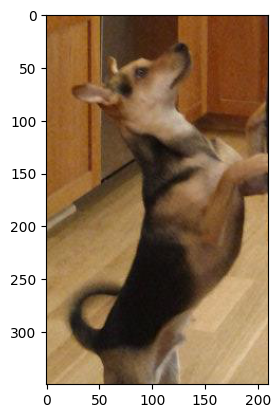

In [152]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1]
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the
closest endpoint. Display the image using `plt.imshow`.

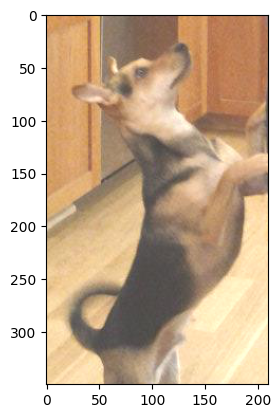

In [151]:
# valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers
img_add = np.clip(img / 255 + 0.25, 0, 1)

plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

In [131]:
img.shape
# alpha channel is opacity

(350, 210, 4)

In [165]:
img_cropped = img[:130, :150, :3]
img_cropped.shape

(130, 150, 3)

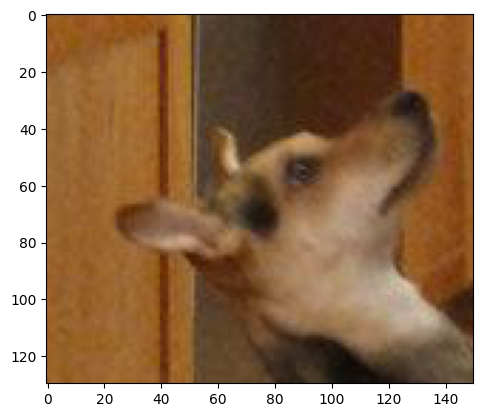

In [139]:
# display the image
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [140]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [166]:
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [156]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

Answer: 0, because all numbers from the original image has integer RGB values in range 0-255 and element in tensor has `dtype=torch.uint8 `

In [176]:
img_torch

tensor([[[150,  95,  38],
         [147,  92,  35],
         [142,  87,  30],
         ...,
         [148,  87,  33],
         [154,  93,  39],
         [157,  96,  42]],

        [[138,  82,  23],
         [144,  88,  29],
         [152,  96,  37],
         ...,
         [150,  89,  35],
         [155,  94,  40],
         [158,  97,  43]],

        [[157,  96,  39],
         [158,  98,  38],
         [158,  98,  36],
         ...,
         [151,  90,  35],
         [157,  96,  41],
         [160,  99,  44]],

        ...,

        [[154,  99,  43],
         [155, 100,  43],
         [156, 101,  44],
         ...,
         [ 97,  79,  55],
         [ 96,  78,  54],
         [ 96,  79,  53]],

        [[150,  95,  39],
         [155, 100,  44],
         [158, 103,  46],
         ...,
         [ 99,  81,  59],
         [ 97,  79,  55],
         [ 97,  79,  55]],

        [[148,  93,  37],
         [154,  99,  43],
         [159, 104,  48],
         ...,
         [107,  86,  65],
        

0, because all numbers from the original image has integer RGB values in range 0-255

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return?
Is the original variable `img_torch` updated? Explain.

Answer:
1. `img_torch.transpose(0,2)` transpose (swap) the dimesntion 0 and dimension2 of img_torch.
2. the expression returns the transposed tensor
3. original variable `img_torch` is not updated, as printed its shape has not change

In [181]:
img_transpose_torch =img_torch.transpose(0, 2)
img_transpose_torch

tensor([[[150, 138, 157,  ..., 154, 150, 148],
         [147, 144, 158,  ..., 155, 155, 154],
         [142, 152, 158,  ..., 156, 158, 159],
         ...,
         [148, 150, 151,  ...,  97,  99, 107],
         [154, 155, 157,  ...,  96,  97, 103],
         [157, 158, 160,  ...,  96,  97, 101]],

        [[ 95,  82,  96,  ...,  99,  95,  93],
         [ 92,  88,  98,  ..., 100, 100,  99],
         [ 87,  96,  98,  ..., 101, 103, 104],
         ...,
         [ 87,  89,  90,  ...,  79,  81,  86],
         [ 93,  94,  96,  ...,  78,  79,  82],
         [ 96,  97,  99,  ...,  79,  79,  80]],

        [[ 38,  23,  39,  ...,  43,  39,  37],
         [ 35,  29,  38,  ...,  43,  44,  43],
         [ 30,  37,  36,  ...,  44,  46,  48],
         ...,
         [ 33,  35,  35,  ...,  55,  59,  65],
         [ 39,  40,  41,  ...,  54,  55,  61],
         [ 42,  43,  44,  ...,  53,  55,  59]]], dtype=torch.uint8)

In [183]:
print(img_torch.shape)
print(img_transpose_torch.shape)

torch.Size([130, 150, 3])
torch.Size([3, 150, 130])


Note:
- While the input variable is not updated by this particular expression, based on [pytorch documentation on torch.transpose](https://pytorch.org/docs/stable/generated/torch.transpose.html), since input `img_torch` is a strided tensor, input and output of this expression shares the same memory space, and the difference comes from how we access the memory space. So, if we upate value in one, the value in the other will also get updated.

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return?
Is the original variable `img_torch` updated? Explain.

### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate

Please select at least three different options from the list above. For each option, please select two to three different parameters and provide a table.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()


# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?